Importing the dataset

In [ ]:
from zipfile import ZipFile
file_name_1 = "/content/Skin datasets Images.zip"
with ZipFile(file_name_1,'r') as zip:
  zip.extractall()
  print("Done")

Done


Importing essential libraries and pakages

In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as  plt
import pickle

In [ ]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_data_dir = '/content/Skin datasets Images/train'
test_data_dir = '/content/Skin datasets Images/test'

In [ ]:
print(train_data_dir)

/content/Skin datasets Images/train


Generating data using ImageDataGenerator

In [ ]:
train_dataGen = ImageDataGenerator(rotation_range = 10,width_shift_range=0.2,height_shift_range=0.2,rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.4,
                                  horizontal_flip = True)

In [ ]:
from glob import glob
folders = glob('/content/Skin datasets Images/train/*')

Creating a model using VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Dense, Lambda, Flatten
from keras.models import Model
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
IMG_SIZE = [224,224]
vgg = VGG16(input_shape = IMG_SIZE +[3], weights = 'imagenet', include_top = False,input_tensor=Input(shape=(48, 48, 3)))

for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
train_set = train_dataGen.flow_from_directory('/content/Skin datasets Images/train', target_size=(48,48), batch_size = 16,class_mode='categorical')

label_map = (train_set.class_indices)
print(label_map)
test_set = test_datagen.flow_from_directory('/content/Skin datasets Images/test', target_size=(48,48), batch_size = 16,class_mode='categorical')

Found 319 images belonging to 3 classes.
{'acne': 0, 'eczema': 1, 'melanoma': 2}
Found 107 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(train_set,validation_data=test_set,epochs=13,steps_per_epoch=len(train_set),validation_steps=len(test_set))

Epoch 1/13
20/20 [==============================] - 2s 102ms/step - loss: 1.0989 - accuracy: 0.4075 - val_loss: 1.1068 - val_accuracy: 0.4393
Epoch 2/13
20/20 [==============================] - 1s 59ms/step - loss: 0.9443 - accuracy: 0.5611 - val_loss: 1.0489 - val_accuracy: 0.4486
Epoch 3/13
20/20 [==============================] - 1s 60ms/step - loss: 0.8822 - accuracy: 0.6113 - val_loss: 0.9931 - val_accuracy: 0.5047
Epoch 4/13
20/20 [==============================] - 1s 59ms/step - loss: 0.8678 - accuracy: 0.6238 - val_loss: 0.9576 - val_accuracy: 0.5421
Epoch 5/13
20/20 [==============================] - 1s 59ms/step - loss: 0.8293 - accuracy: 0.6270 - val_loss: 0.9135 - val_accuracy: 0.5607
Epoch 6/13
20/20 [==============================] - 1s 63ms/step - loss: 0.7954 - accuracy: 0.6646 - val_loss: 0.8972 - val_accuracy: 0.5701
Epoch 7/13
20/20 [==============================] - 1s 62ms/step - loss: 0.7853 - accuracy: 0.6771 - val_loss: 0.8648 - val_accuracy: 0.5981
Epoch 8/13
2

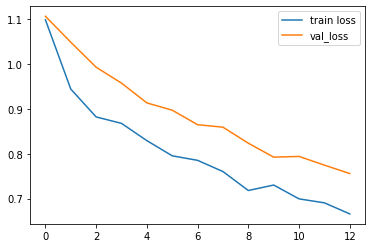

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

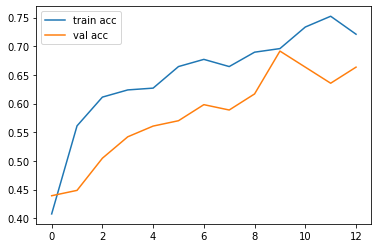

In [ ]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('model_3_Classes_1.h5')

model with train acuuracy of 72.1% and validation accuracy of 66.36%

In [ ]:
dic = {'acne': 0, 'eczema': 1, 'melanoma': 2}
keys = list(dic.keys())
vals = list(dic.values())


In [ ]:
from PIL import Image
img = cv2.imread('/content/melanoma_1.jpg') # image path in this path should be given
img = cv2.resize(img, (48,48))
from keras.preprocessing import image
img = Image.fromarray(img,'RGB')
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)
pred = model.predict(img_array)


In [ ]:
print(keys[vals.index(np.argmax(pred))])